# Global Power Plant Database Project


**Problem Statement:**


**Description**

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


**Key attributes of the database.**



The database includes the following indicators:



 - country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
 - country_long (text): longer form of the country designation
 - name (text): name or title of the power plant, generally in Romanized form
 - gppd_idnr (text): 10 or 12 character identifier for the power plant
 - capacity_mw (number): electrical generating capacity in megawatts
 - latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
 - longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
 - primary_fuel (text): energy source used in primary electricity generation or export
 - other_fuel1 (text): energy source used in electricity generation or export
 - other_fuel2 (text): energy source used in electricity generation or export
 - other_fuel3 (text): energy source used in electricity generation or export
 - commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available
 - owner (text): majority shareholder of the power plant, generally in Romanized form
 - source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
 - url (text): web document corresponding to the source field
 - geolocation_source (text): attribution for geolocation information
 - wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
 - year_of_capacity_data (number): year the capacity information was reported
 - generation_data_source (text): attribution for the reported generation information
 - generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
 - generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
 - generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
 - generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016
 - generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017
 - generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018
 - generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019
 - estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013
 - estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014
 - estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015
 - estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016
 - estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017
 - estimated_generation_note_2013 (text): label of the model/method used to estimate generation for the year 2013
 - estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
 - estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
 - estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
 - estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 201 7  

 **Fuel Type Aggregation**



We define the "Fuel Type" attribute of our database based on common fuel categories.



**Predictions:**

1) Make two prediction for labels 1) primary_fuel
2) capacity_mw

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [14]:
# Data Load 
url = ("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df = pd.read_csv(url)

In [15]:
# Set Max Option for Data Set 
pd.set_option("display.max_column", None)
pd.set_option("display.max_row", None)

In [60]:
# Show Data 
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  other_fuel3  \
0   28.1839    73.2407        Solar         NaN         NaN          NaN   
1   24.7663    74.6090         Coal         NaN         NaN          NaN   
2   21.9038    69.3732         Wind         NaN         NaN          NaN   
3   23.8712    91.3602          Gas         NaN         NaN          NaN   
4   21.9603    82.4091         Coal         Oil         NaN          NaN   

   commissioning_year                 owner  \
0              2011.0           Solar Paces   
1                 NaN  Ultratech Cement ltd   
2                 NaN                   AES   
3              2004.0                   NaN   
4              2015.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  wepp_id  year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                    NaN   
1                                   WRI      NaN                    NaN   
2                                   WRI      NaN                    NaN   
3                                   WRI      NaN                 2019.0   
4                                   WRI      NaN                 2019.0   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN           617.789264              843.747   
4                  NaN          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

   generation_gwh_2019         generation_data_source  \
0                  NaN                            NaN   
1                  NaN                            NaN   
2                  NaN                            NaN   
3                  NaN  Central Electricity Authority   
4                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

There are two labels that need to be predicted.
- The first one is regression with the label capacity_mw and 
- The second one is classification with the target variable primary fuel.

In [18]:
# Data Shape
df.shape

(907, 27)

- There are 907 rows and 27 column's

In [20]:
# Get Breaf Information of Data Set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

- There are some numerical values and some categorical columns

In [27]:
# Column Name of float Type of data  
float_features = df.select_dtypes(include=['object']).columns
print("Total Numbers of float Features: ", float_features.shape[0])

print("float Feature Name: ", float_features.tolist())

Total Numbers of float Features:  12
float Feature Name:  ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'other_fuel2', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']


In [28]:
# Column Name of Categorical Type of data  
cat_features = df.select_dtypes(include=['float64']).columns
print("Total Numbers of Categorical Features: ", cat_features.shape[0])

print("Categorical Feature Name: ", cat_features.tolist())

Total Numbers of Categorical Features:  15
Categorical Feature Name:  ['capacity_mw', 'latitude', 'longitude', 'other_fuel3', 'commissioning_year', 'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'estimated_generation_gwh']


In [29]:
# Null Value count of data 
null_count = df.isnull().sum()
null_count

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In the above cell we can see that there are missing values in many columns and few even have all the 907 rows empty that will need to be removed since it provides no insights.

In [30]:
# Percent of Null Value of data 
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.071665
longitude                     5.071665
primary_fuel                  0.000000
other_fuel1                  78.169791
other_fuel2                  99.889746
other_fuel3                 100.000000
commissioning_year           41.896362
owner                        62.293275
source                        0.000000
url                           0.000000
geolocation_source            2.094818
wepp_id                     100.000000
year_of_capacity_data        42.778390
generation_gwh_2013         100.000000
generation_gwh_2014          56.119074
generation_gwh_2015          53.472988
generation_gwh_2016          52.149945
generation_gwh_2017          51.488423
generation_gwh_2018          50.606395
generation_gwh_2019         100.000000
generation_data_source   

In [31]:
# Column names that have more than 50% of missing data and will need to be deleted are:
Mis_value_50_perc = null_percent[null_percent > 50]
Mis_value_50_perc

other_fuel1                  78.169791
other_fuel2                  99.889746
other_fuel3                 100.000000
owner                        62.293275
wepp_id                     100.000000
generation_gwh_2013         100.000000
generation_gwh_2014          56.119074
generation_gwh_2015          53.472988
generation_gwh_2016          52.149945
generation_gwh_2017          51.488423
generation_gwh_2018          50.606395
generation_gwh_2019         100.000000
generation_data_source       50.496141
estimated_generation_gwh    100.000000
dtype: float64

<AxesSubplot:>

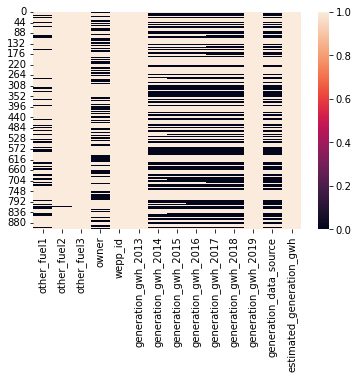

In [48]:
# Heat map for Null Value of more than 50% 
sns.heatmap(df[Mis_value_50_perc.keys()].isnull())

In [33]:
# Column names that have more than 20% and Less than 50% of missing data and will need to be deleted are:
Mis_value_20_50_perc = null_percent[(null_percent > 20) & (null_percent < 50)]
Mis_value_20_50_perc

commissioning_year       41.896362
year_of_capacity_data    42.778390
dtype: float64

<AxesSubplot:>

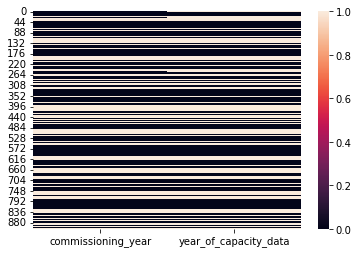

In [49]:
# Heat map for Null Value of more than 20% and less than 50%
sns.heatmap(df[Mis_value_20_50_perc.keys()].isnull())

In [34]:
# Column names that have more than 5% and Less than 20% of missing data and will need to be deleted are:
Mis_value_5_20_perc = null_percent[(null_percent > 5) & (null_percent < 20)]
Mis_value_5_20_perc

latitude     5.071665
longitude    5.071665
dtype: float64

<AxesSubplot:>

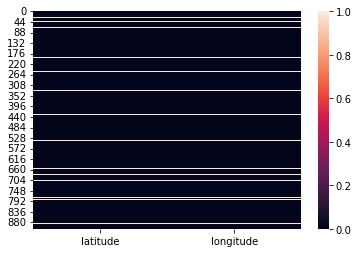

In [50]:
# Heat map for Null Value of more than 5% and less than 20%
sns.heatmap(df[Mis_value_5_20_perc.keys()].isnull())

In [66]:
# Unique value of data 
df.nunique().to_frame("Unique Value")

Unique Value
country                              1
country_long                         1
name                               907
gppd_idnr                          907
capacity_mw                        361
latitude                           836
longitude                          827
primary_fuel                         8
other_fuel1                          3
other_fuel2                          1
other_fuel3                          0
commissioning_year                  73
owner                              280
source                             191
url                                304
geolocation_source                   3
wepp_id                              0
year_of_capacity_data                1
generation_gwh_2013                  0
generation_gwh_2014                371
generation_gwh_2015                396
generation_gwh_2016                403
generation_gwh_2017                408
generation_gwh_2018                410
generation_gwh_2019                  0
generation_data_source               1
estimated_generation_gwh             0

In [74]:
# Dropping the columns that do not have any non-null value and less value
df.drop(columns = ['other_fuel2', 'other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019', 'estimated_generation_gwh'], axis = 1, inplace = True)

In [88]:
df.shape

(907, 21)

In [89]:
df.describe()


capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  861.000000  861.000000          527.000000   
mean    326.223755   21.197918   77.464907         1997.091082   
std     590.085456    6.239612    4.939316           17.082868   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   16.773900   74.256200         1988.000000   
50%      59.200000   21.780000   76.719500         2001.000000   
75%     385.250000   25.512400   79.440800         2012.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
count                  519.0           398.000000           422.000000   
mean                  2019.0          2431.823590          2428.226946   
std                      0.0          4026.440035          4194.596959   
min                   2019.0             0.000000             0.000000   
25%                   2019.0           223.557672           176.381063   
50%                   2019.0           801.123775           711.181225   
75%                   2019.0          3035.306250          3084.121250   
max                   2019.0         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
count           434.000000           440.000000           448.000000  
mean           2467.936859          2547.759305          2600.804099  
std            4162.884308          4196.991169          4314.880456  
min               0.000000             0.000000             0.000000  
25%             188.285252           177.874930           193.378250  
50%             737.205450           817.977250           751.644375  
75%            3282.861313          3275.690475          3143.535900  
max           30015.000000         35116.000000         35136.000000

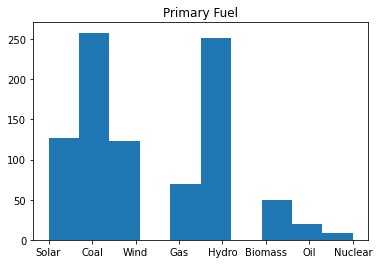

In [92]:
# Histogram for Primary Fuel

df['primary_fuel'].hist(grid = False)
plt.title('Primary Fuel')
plt.show()

- The representation of the column primary fuel as it is one the target variable
- There is class imbalance in this data
- Very high skewness in the column capacity_mw

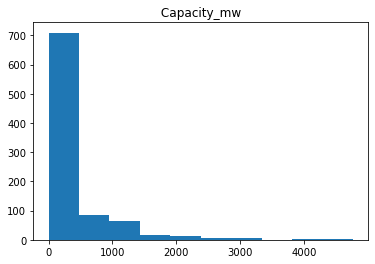

In [93]:
# Histogram for Capacity_MW

df['capacity_mw'].hist(grid = False)
plt.title(' Capacity_mw ')
plt.show()

The visual representation of the capacity_mw column, there is high skewness



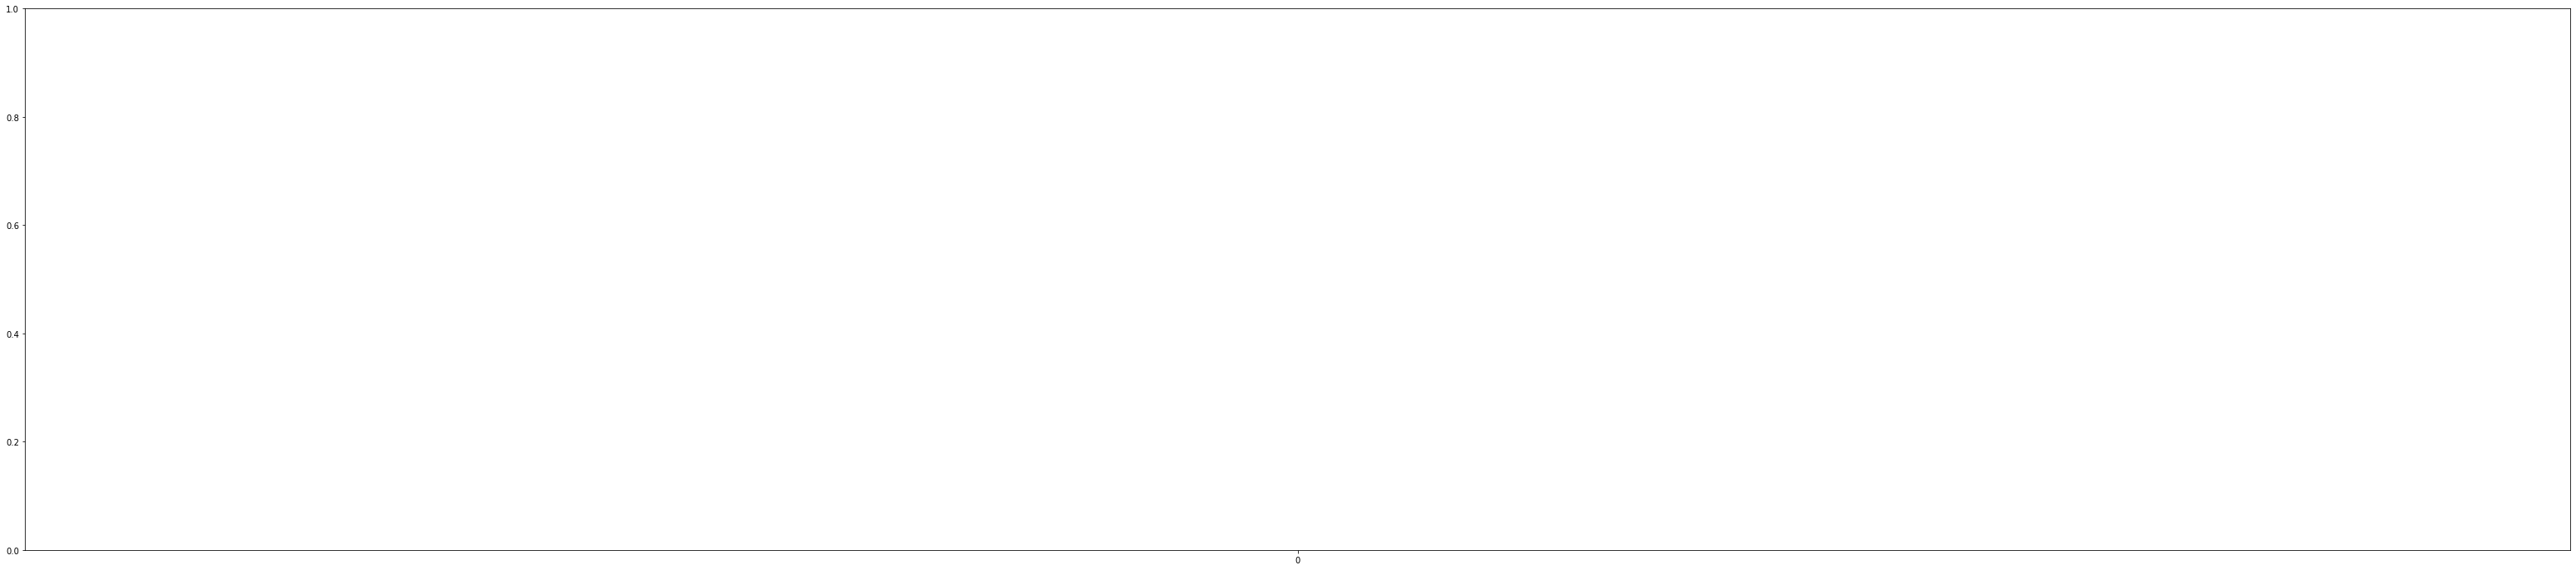

In [98]:
# The boxplot shows that there are many outliers
fig, ax = plt.subplots(1, 1, figsize=(55, 12))
sns.boxplot(df = df, ax=ax)
plt.show()

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'year_of_capacity_data'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2018'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

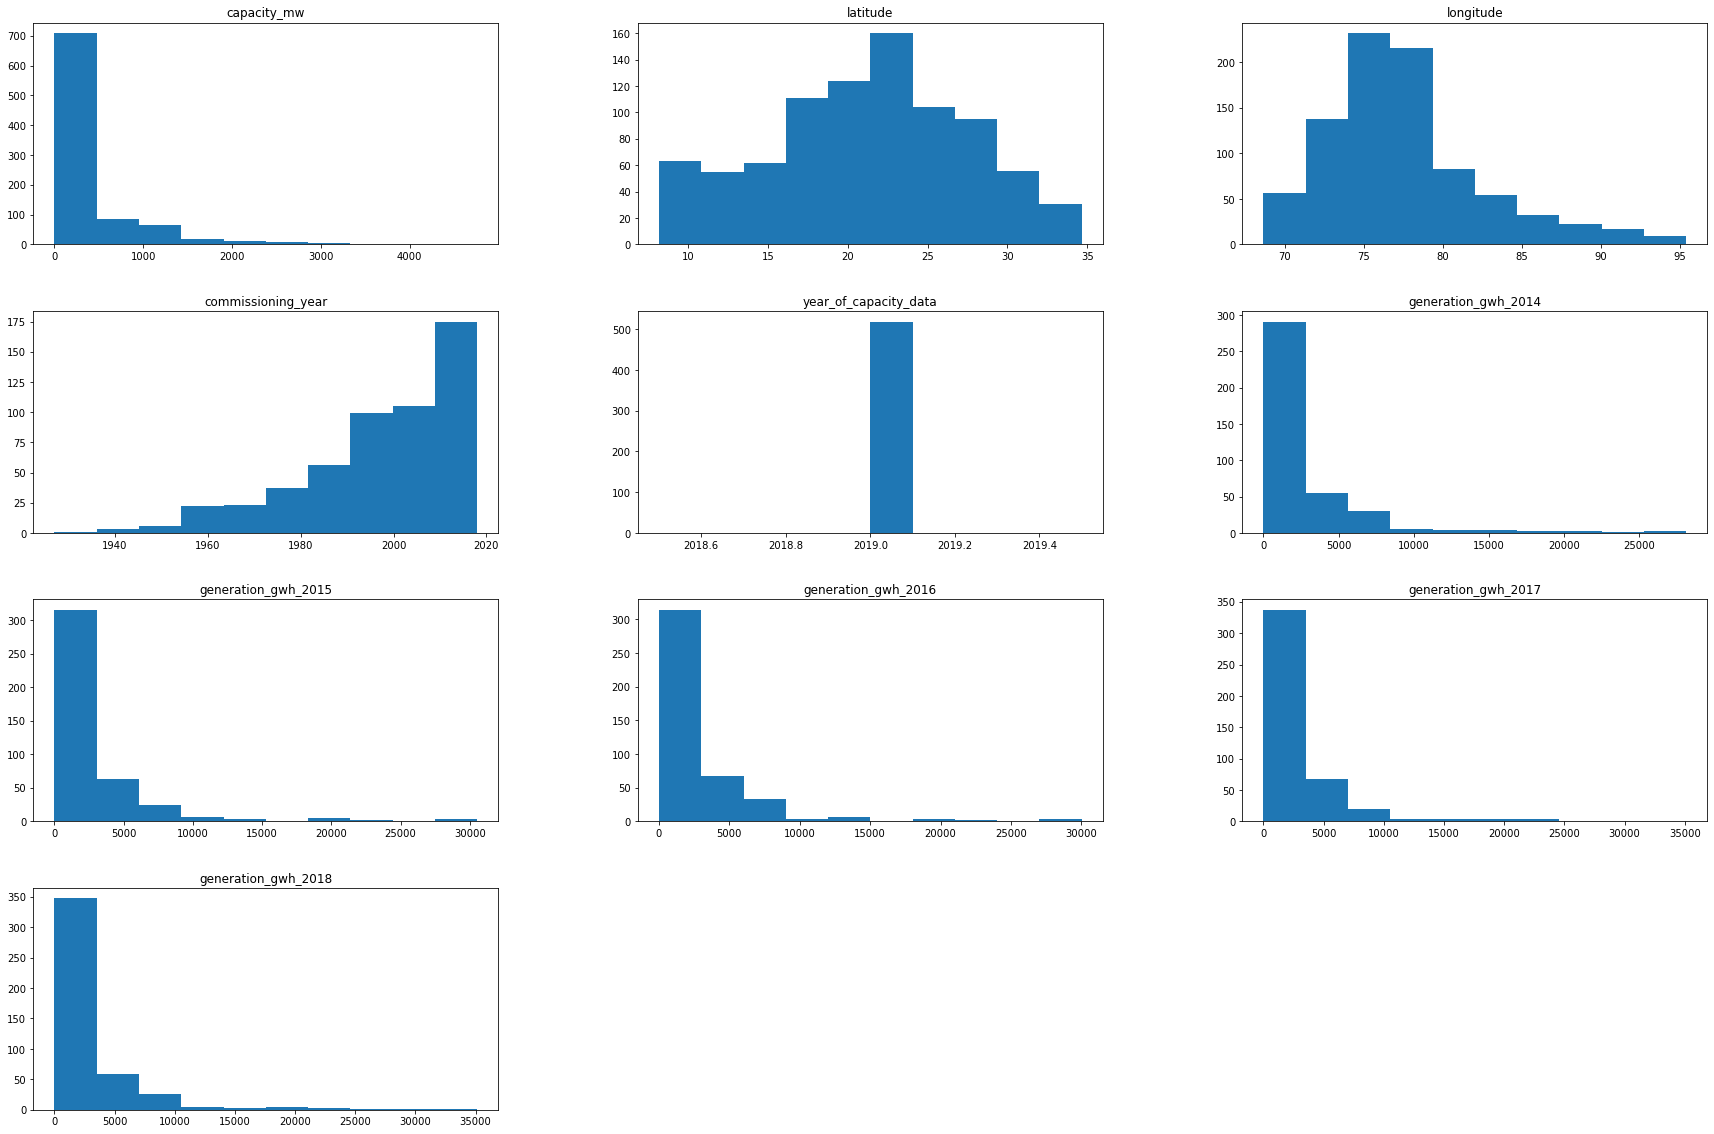

In [96]:
# The data is now less skewed and more towards normal distribution.
df.hist(figsize = (30,20), grid = False)

<AxesSubplot:>

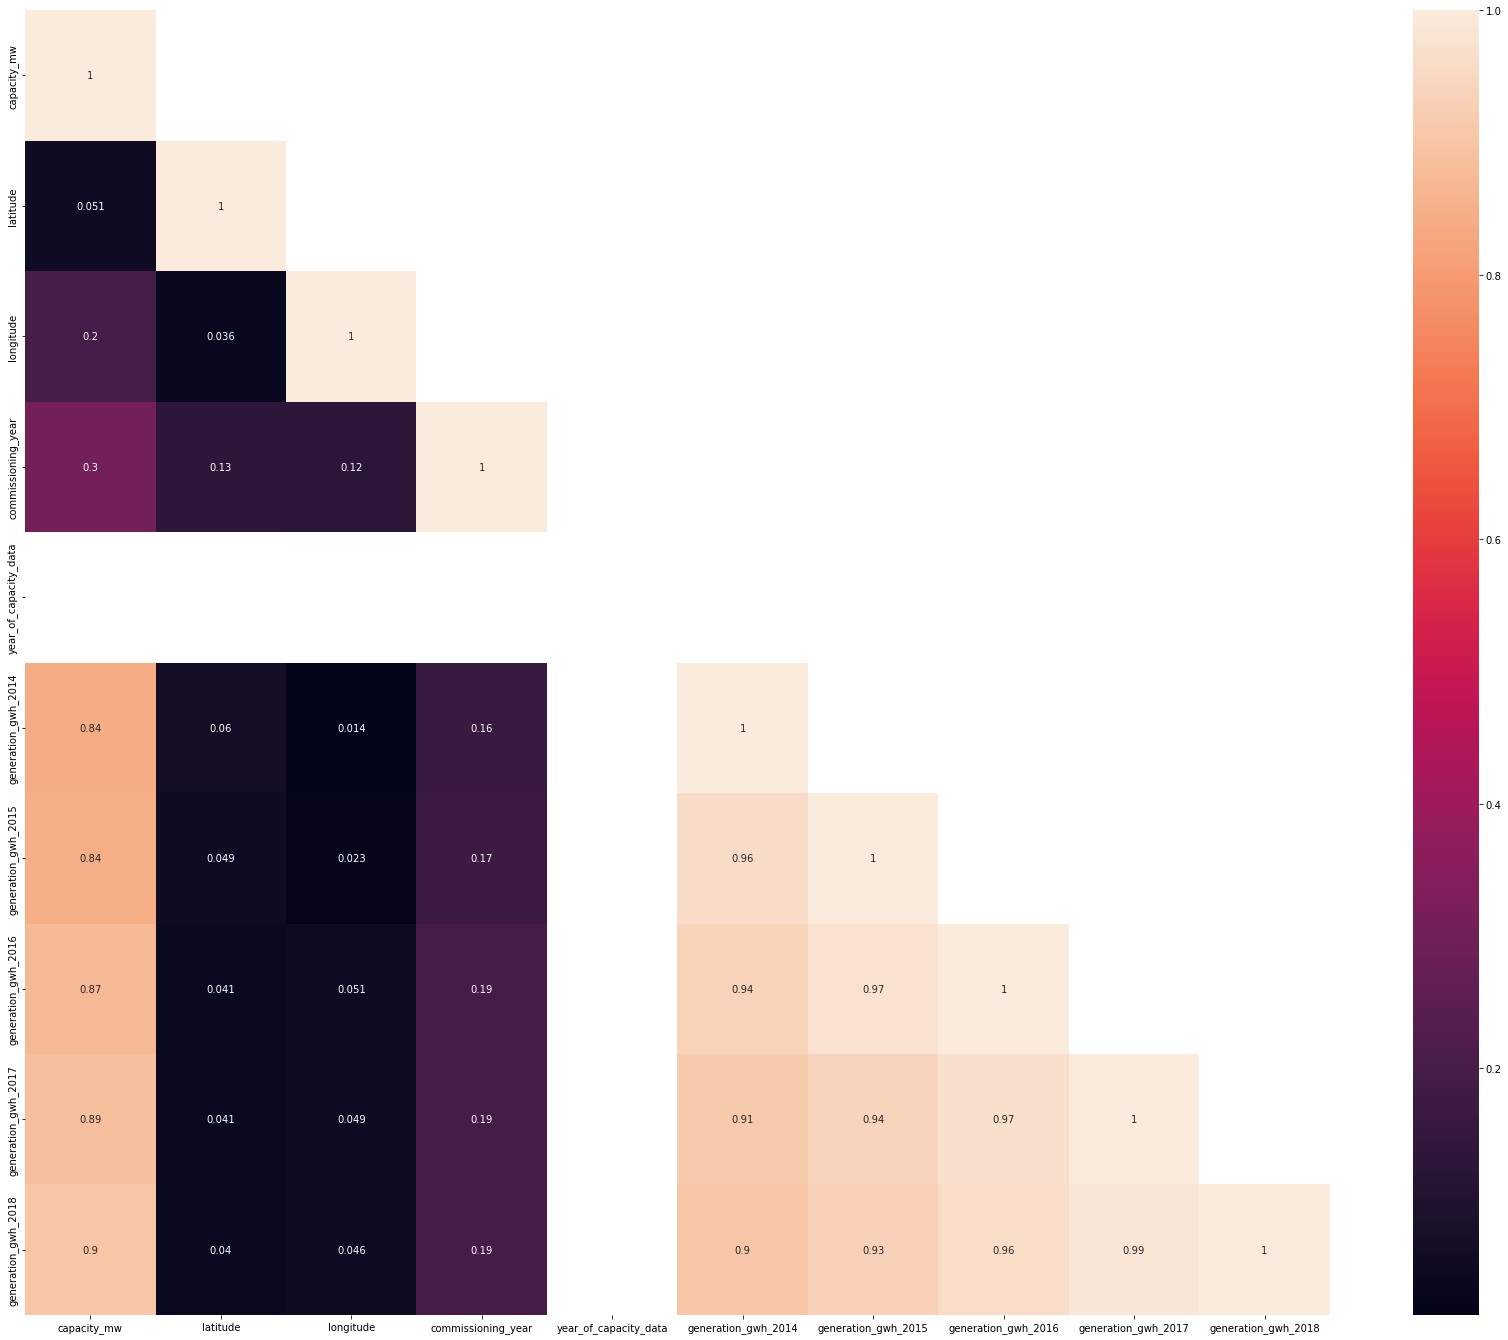

In [102]:
#Correlation Matrix
corr_mat = df.corr()
m = np.array(corr_mat)
m[np.tril_indices_from(m)] = False

fig = plt.gcf()
fig.set_size_inches(30,24)
sns.heatmap(data = corr_mat, mask = m, square = True, annot = True, cbar = True)

- It appears that there is high multicollinearity between certain columns.

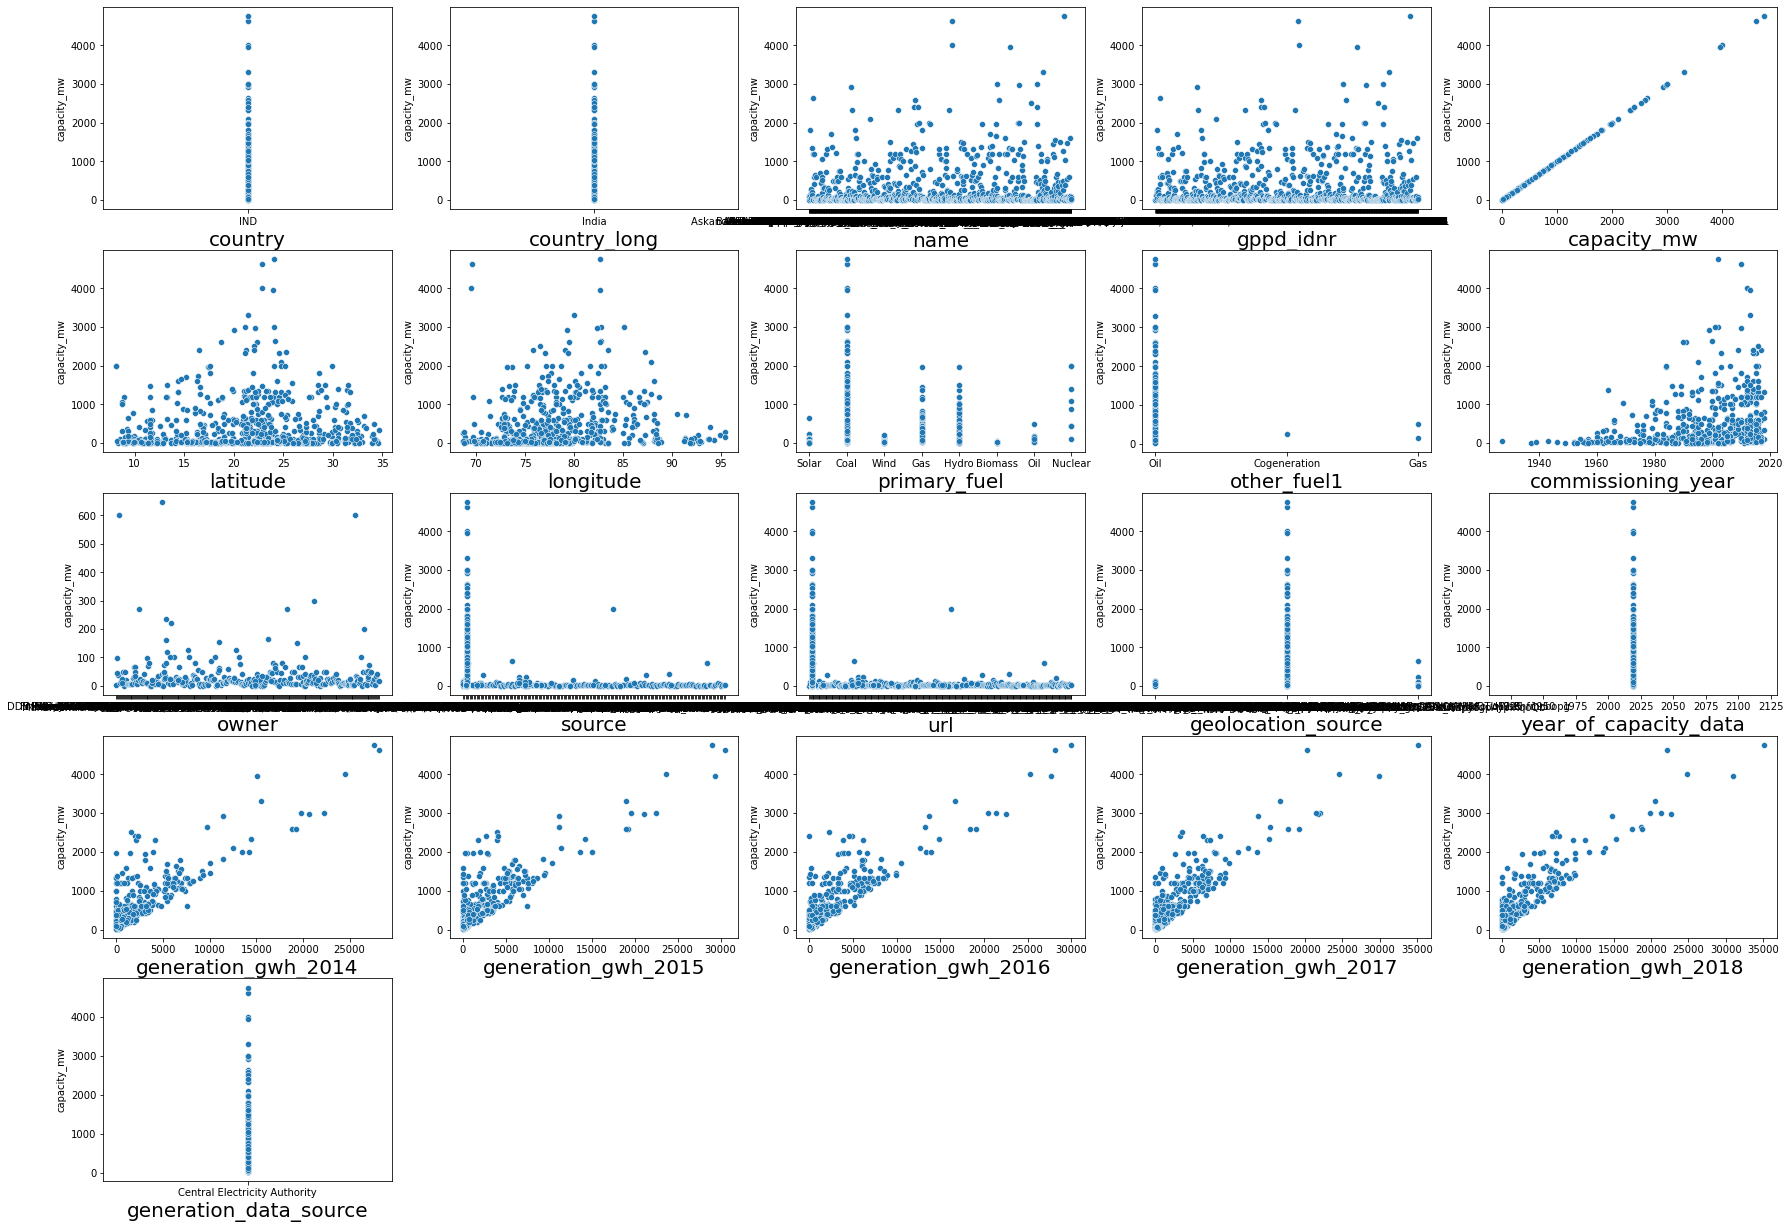

In [107]:
# Scatter plot 
plt.figure(figsize = (30,35))
graph = 1

for column in df:
  if graph<=40:
    ax = plt.subplot(8,5,graph)
    sns.scatterplot(x = df[column], y = 'capacity_mw', data = df)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

Scatter plot shows that there does not exist relationship between capacity_mw and some variables. We will drop those variables



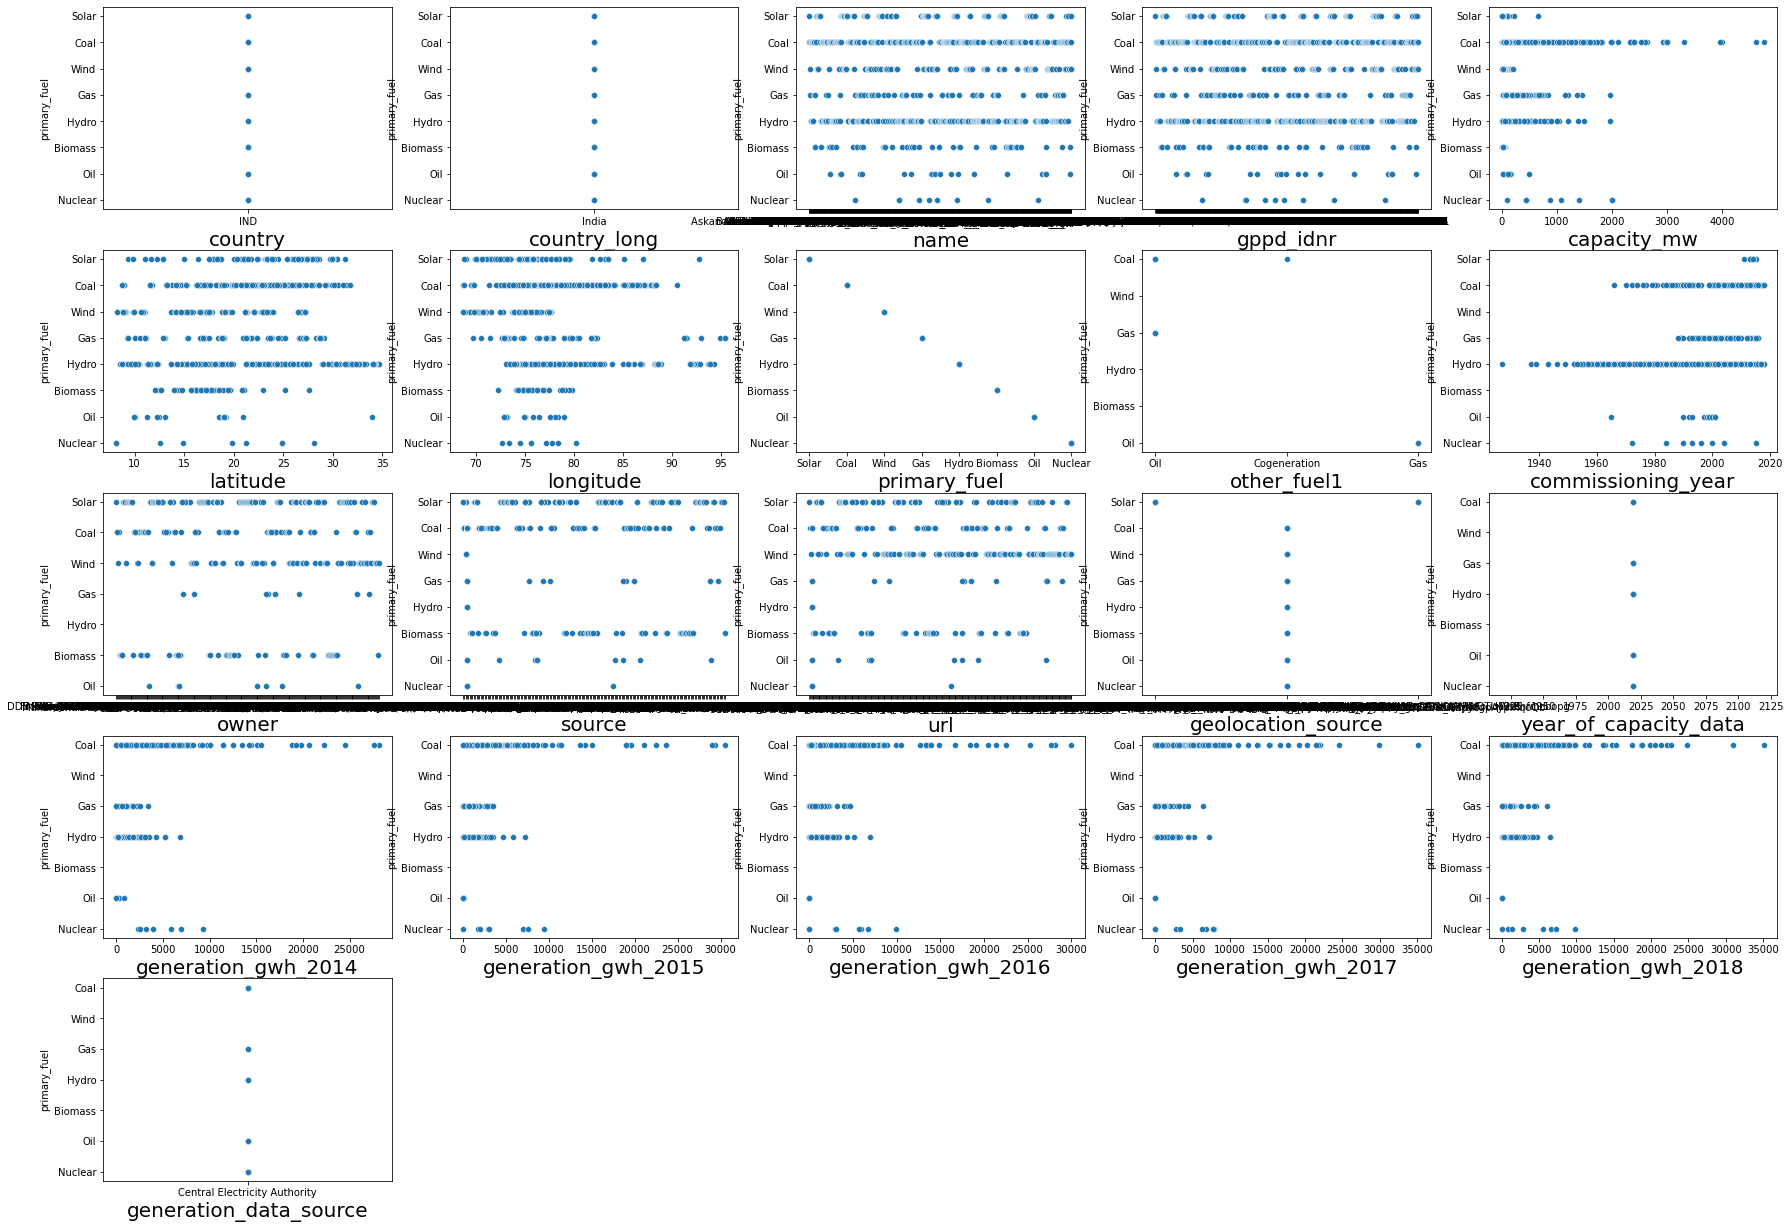

In [109]:
# Scatter Plot
plt.figure(figsize = (30,35))
graph = 1

for column in df:
  if graph<=40:
    ax = plt.subplot(8,5,graph)
    sns.scatterplot(x = df[column], y = 'primary_fuel', data = df)
    plt.xlabel(column, fontsize = 20)
  graph+=1
plt.show()

Some variable do not have any relationship with primary_fuel



In [111]:
df.skew()

capacity_mw              3.123576
latitude                -0.145866
longitude                1.112646
commissioning_year      -1.067949
year_of_capacity_data    0.000000
generation_gwh_2014      3.342707
generation_gwh_2015      3.665904
generation_gwh_2016      3.512370
generation_gwh_2017      3.566070
generation_gwh_2018      3.476298
dtype: float64

There is high skewness in some variables



<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

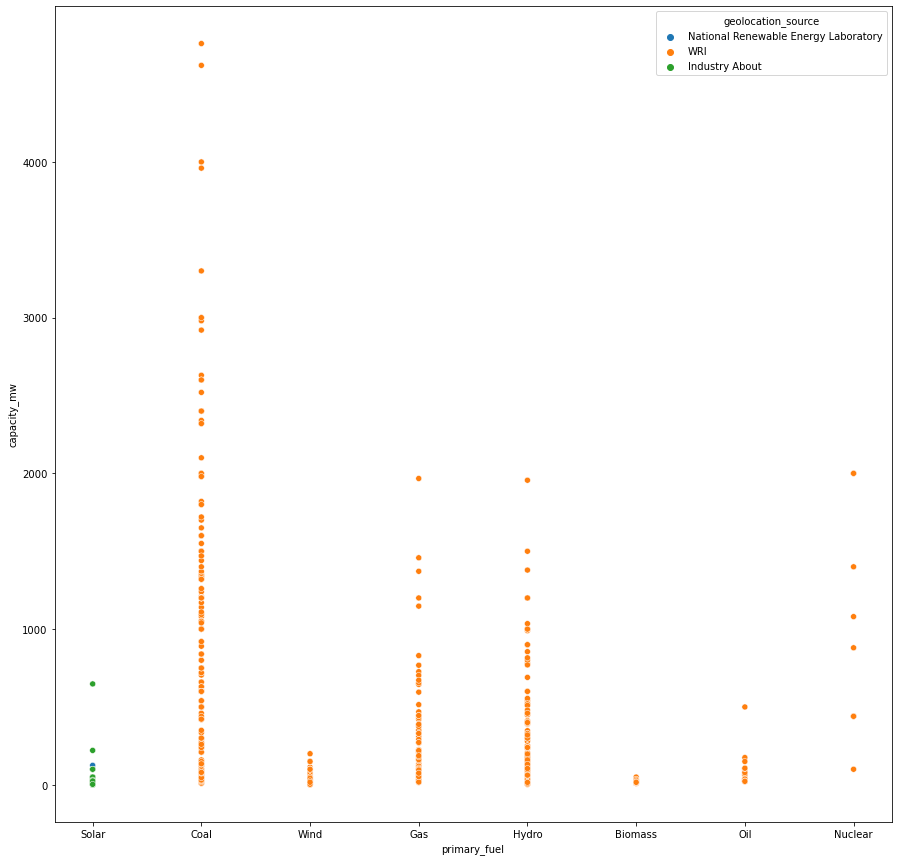

In [113]:
fig,axes=plt.subplots(1,1,figsize=(15,15))
sns.scatterplot(x='primary_fuel',y='capacity_mw',hue='geolocation_source',data=df)

The scatter plot shows the relationship between capacity_mw and primary_level



In [114]:
df['generation_data_source'].value_counts()


Central Electricity Authority    449
Name: generation_data_source, dtype: int64

There is only a single entry in generation_data_source. It will not help in prediction, so it is better to drop it.



In [115]:
# Dropped the column
df.drop(columns = ['generation_data_source'], axis = 1, inplace = True)


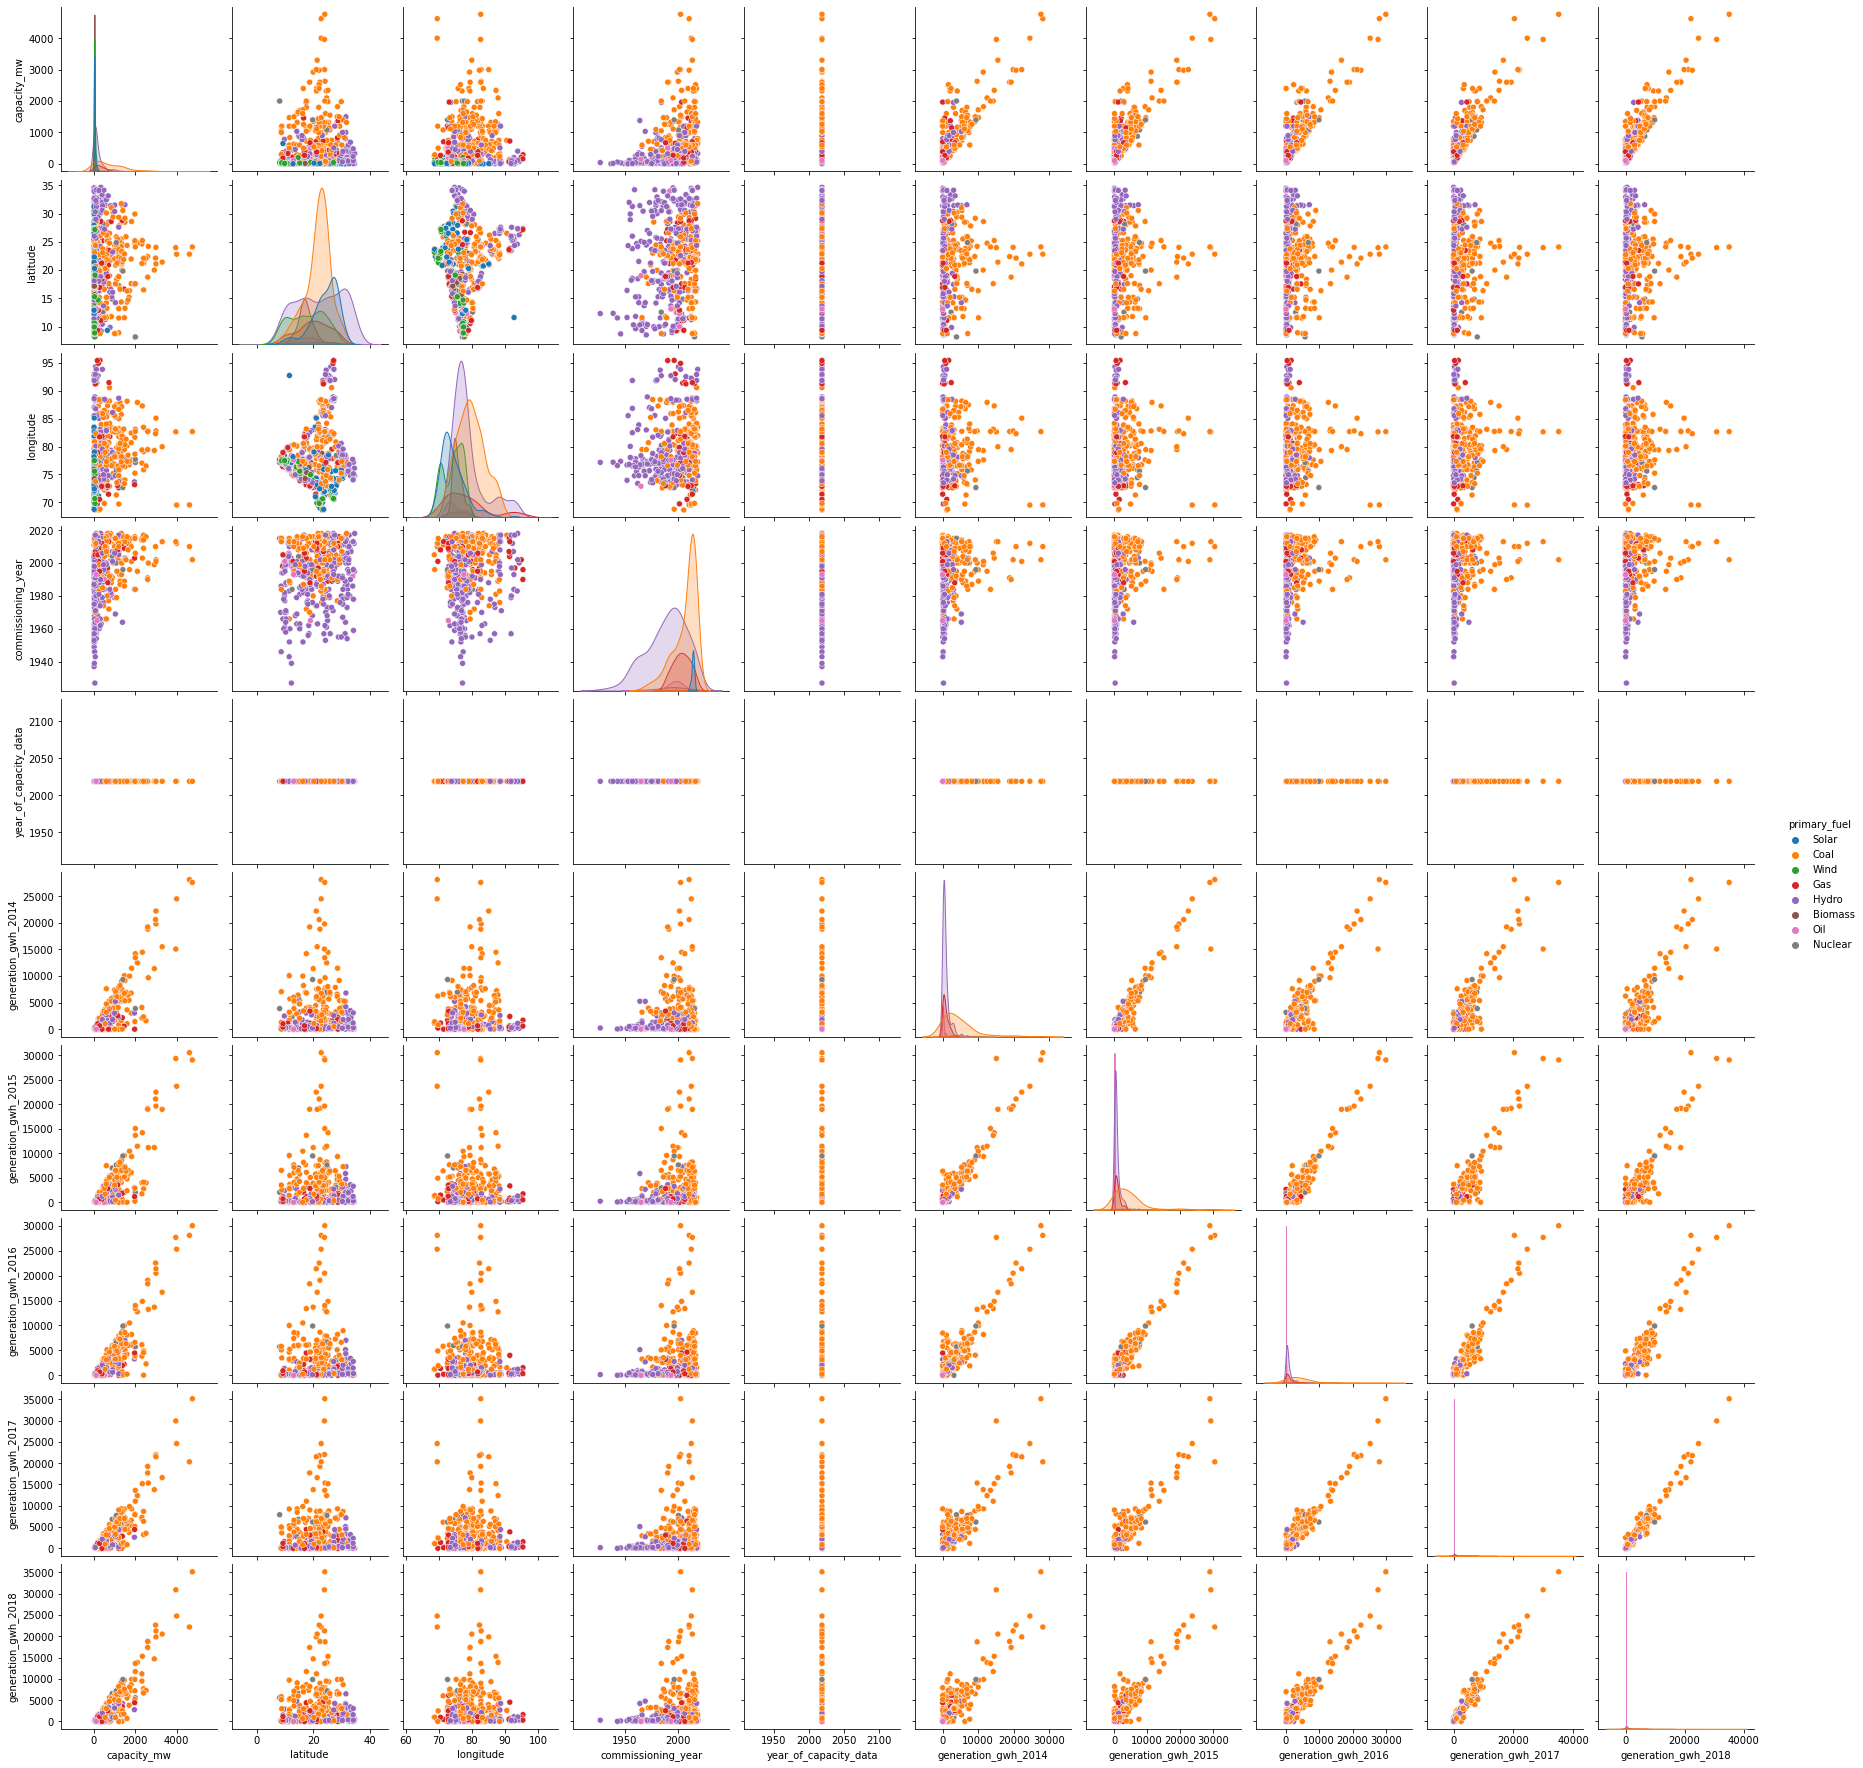

In [117]:
sns.pairplot(df, hue = 'primary_fuel')


Pairplot shows that coal is associated with the high capacity.



In [119]:
#Dealing with null values

from sklearn.impute import KNNImputer
knn_ipm = KNNImputer(n_neighbors = 3)
data_filled = knn_ipm.fit_transform(df[['latitude', 'longitude', 'commissioning_year', 'generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017', 'generation_gwh_2018']])

data1 = pd.DataFrame(data_filled)

Dealt with null values using KNNImputer



In [122]:
# filling missing data for continous values with mean
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

# filling missing data for categorical values with mode
df["commissioning_year"].fillna(df["commissioning_year"].mode()[0],inplace=True)
df["geolocation_source"].fillna(df["geolocation_source"].mode()[0],inplace=True)

Since we had to take care of the missing data I have chosen to fill the null values in continous data column with it's mean and the null values for categorical data column with it's mode information.



In [123]:
df['country'].value_counts()

IND    907
Name: country, dtype: int64

- There is a single country, so it is better to drop it



In [124]:
df['country_long'].value_counts()

India    907
Name: country_long, dtype: int64

- There is a single country long, so it is better to drop it



In [126]:
df['name'].value_counts().sum()


907

- There are different names for each row, so it is better to drop it



In [128]:
df['gppd_idnr'].value_counts().sum()


907

In [130]:
for col in object_datatype:
    print(col)
    print(df[col].value_counts().sum())
    print("="*120)

country
907
country_long
907
name
907
gppd_idnr
907
primary_fuel
907
other_fuel1
198
owner
342
source
907
url
907
geolocation_source
907


- There are different gppd_idnr for each row, so it is better to drop it



In [132]:
# generation_gwh_2017
df.drop(columns = ['gppd_idnr','name', 'country_long','country'], axis = 1, inplace = True)

KeyError: "['gppd_idnr', 'name', 'country_long', 'country'] not found in axis"

In [133]:
#Treating the outliers

# findingout the quantile of data with continuous columns
col = df.drop(columns = ['primary_fuel','other_fuel1','owner','source','url','geolocation_source'])
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1
# REMOVING OUTLIERS USING IQR METHOD
data_new = col[~((col < (Q1 -  1.5*IQR)) |(col > (Q3 +  1.5*IQR))).any(axis=1)]
print("shape before and after")
print("shape before".ljust(20),":", col.shape)
print("shape after".ljust(20),":", data_new.shape)
print("Percentage Loss".ljust(20),":", (col.shape[0]-data_new.shape[0])/col.shape[0])

shape before and after
shape before         : (907, 10)
shape after          : (692, 10)
Percentage Loss      : 0.237045203969129


- We can't apply this method, as we are losing 22% data



In [134]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

- Applies label encoder



In [135]:
a = lab_enc.fit_transform(df['primary_fuel'])
b = lab_enc.fit_transform(df['other_fuel1'])
c = lab_enc.fit_transform(df['owner'])
d = lab_enc.fit_transform(df['source'])
e = lab_enc.fit_transform(df['url'])
f = lab_enc.fit_transform(df['geolocation_source'])

- Fitted the data



In [136]:
df['primary_fuel'] = a
df['other_fuel1'] = b
df['owner'] = c
df['source'] = d
df['url'] = e 
df['geolocation_source'] = f
df

capacity_mw   latitude  longitude  primary_fuel  other_fuel1  \
0          2.500  28.183900  73.240700             6            3   
1         98.000  24.766300  74.609000             1            3   
2         39.200  21.903800  69.373200             7            3   
3        135.000  23.871200  91.360200             2            3   
4       1800.000  21.960300  82.409100             1            2   
5        250.000  23.768900  68.644700             1            2   
6         60.000  10.454700  77.007800             3            3   
7        192.000  32.225800  77.207000             3            3   
8        290.000  16.330000  75.886300             3            3   
9        210.000  23.164200  81.637300             1            2   
10      1350.000  21.078200  77.900900             1            2   
11       134.000  31.271700  76.493800             3            3   
12      1200.000  24.200700  82.800000             1            2   
13        16.950  31.241200  77.876900             3            3   
14         9.000  21.197918  77.464907             3            3   
15      2630.000  24.201000  82.789100             1            2   
16       419.330  25.179700  76.318800             2            3   
17       600.000  23.066600  81.784100             1            3   
18      1200.000  23.065500  81.786500             1            2   
19        10.000  18.084500  76.185100             0            3   
20        17.000  19.586700  74.706100             0            3   
21        24.000  16.770800  74.919100             0            3   
22       652.000  26.628200  79.528600             2            3   
23       600.000  21.743800  83.274100             1            2   
24        46.000  19.788100  79.151800             1            3   
25        50.000  21.197918  77.464907             6            3   
26         1.000  28.361500  74.240200             6            3   
27        16.500  14.575100  76.392600             7            3   
28        50.000  14.945500  77.687000             6            3   
29       113.600  18.858000  73.639600             7            3   
30        19.800  10.724500  77.189300             7            3   
31        13.200  14.479100  76.348200             7            3   
32         5.000  27.347300  71.691700             6            3   
33         5.000  27.360000  71.691800             6            3   
34         5.000  27.363200  71.691800             6            3   
35         5.000  27.366100  71.691600             6            3   
36         5.000  27.353700  71.691700             6            3   
37         5.000  27.350400  71.691800             6            3   
38         5.000  27.356600  71.691700             6            3   
39       705.000  28.506000  77.306600             1            2   
40        28.000  16.280400  75.225000             0            3   
41       450.000  33.181500  75.315500             3            3   
42       450.000  21.197918  77.464907             3            3   
43       180.000  32.806300  76.141800             3            3   
44      1050.000  23.828500  87.451300             1            2   
45       600.000  21.197918  77.464907             1            2   
46       510.000  18.139600  82.122100             3            3   
47        67.500  19.860100  79.342100             1            3   
48        10.000  24.692900  74.689000             1            3   
49       300.000  22.342100  82.430500             1            2   
50       335.000  22.995600  88.404200             1            2   
51        12.000  32.168600  76.469500             3            3   
52       315.000  24.191700  81.287500             3            3   
53        30.000  24.191700  81.287500             3            3   
54        60.000  24.191700  81.287500             3            3   
55        20.000  24.223000  81.274700             3            3   
56        20.000  23.602600  74.256200             1            3   
57 

- Substituted the value and reading the data



array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'primary_fuel'}>],
       [<AxesSubplot:title={'center':'other_fuel1'}>,
        <AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'owner'}>,
        <AxesSubplot:title={'center':'source'}>],
       [<AxesSubplot:title={'center':'url'}>,
        <AxesSubplot:title={'center':'geolocation_source'}>,
        <AxesSubplot:title={'center':'year_of_capacity_data'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:title={'center':'generation_gwh_2018'}>]],
      dtype=object)

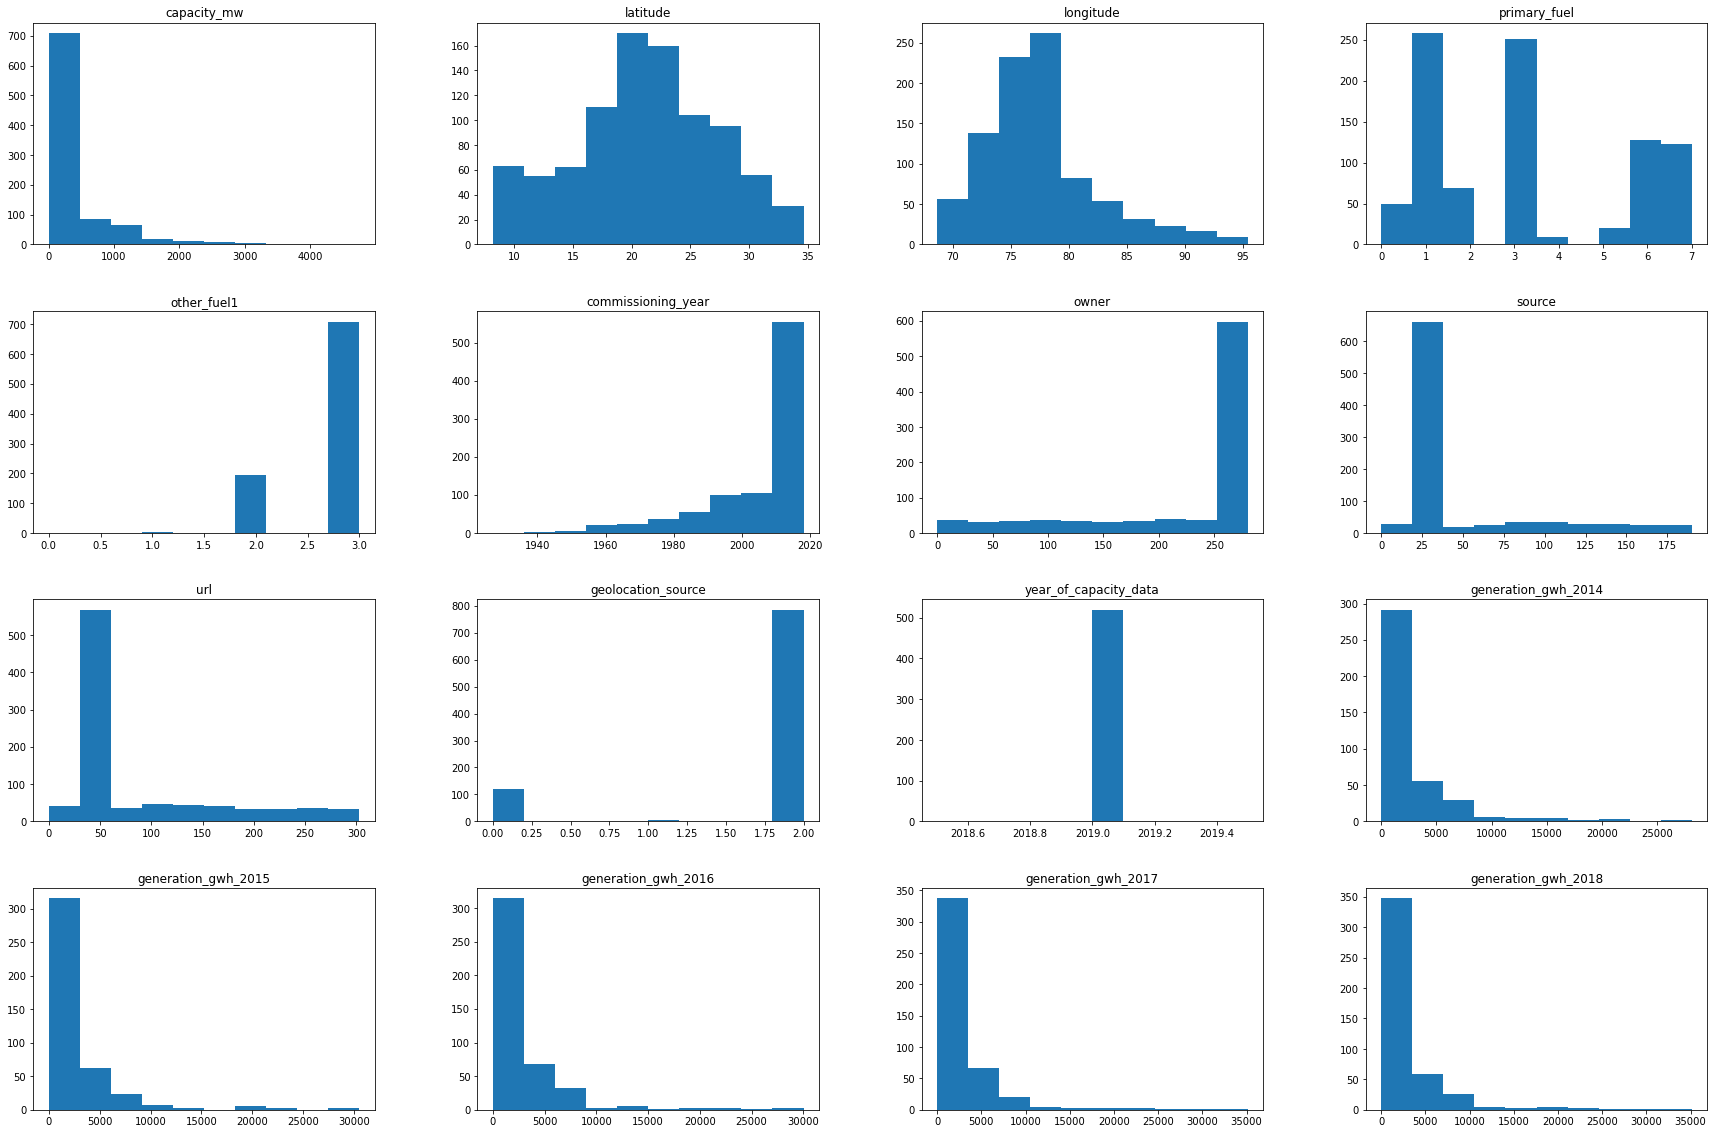

In [137]:
df.hist(figsize = (30,20), grid = False)


- The data is now less skewed



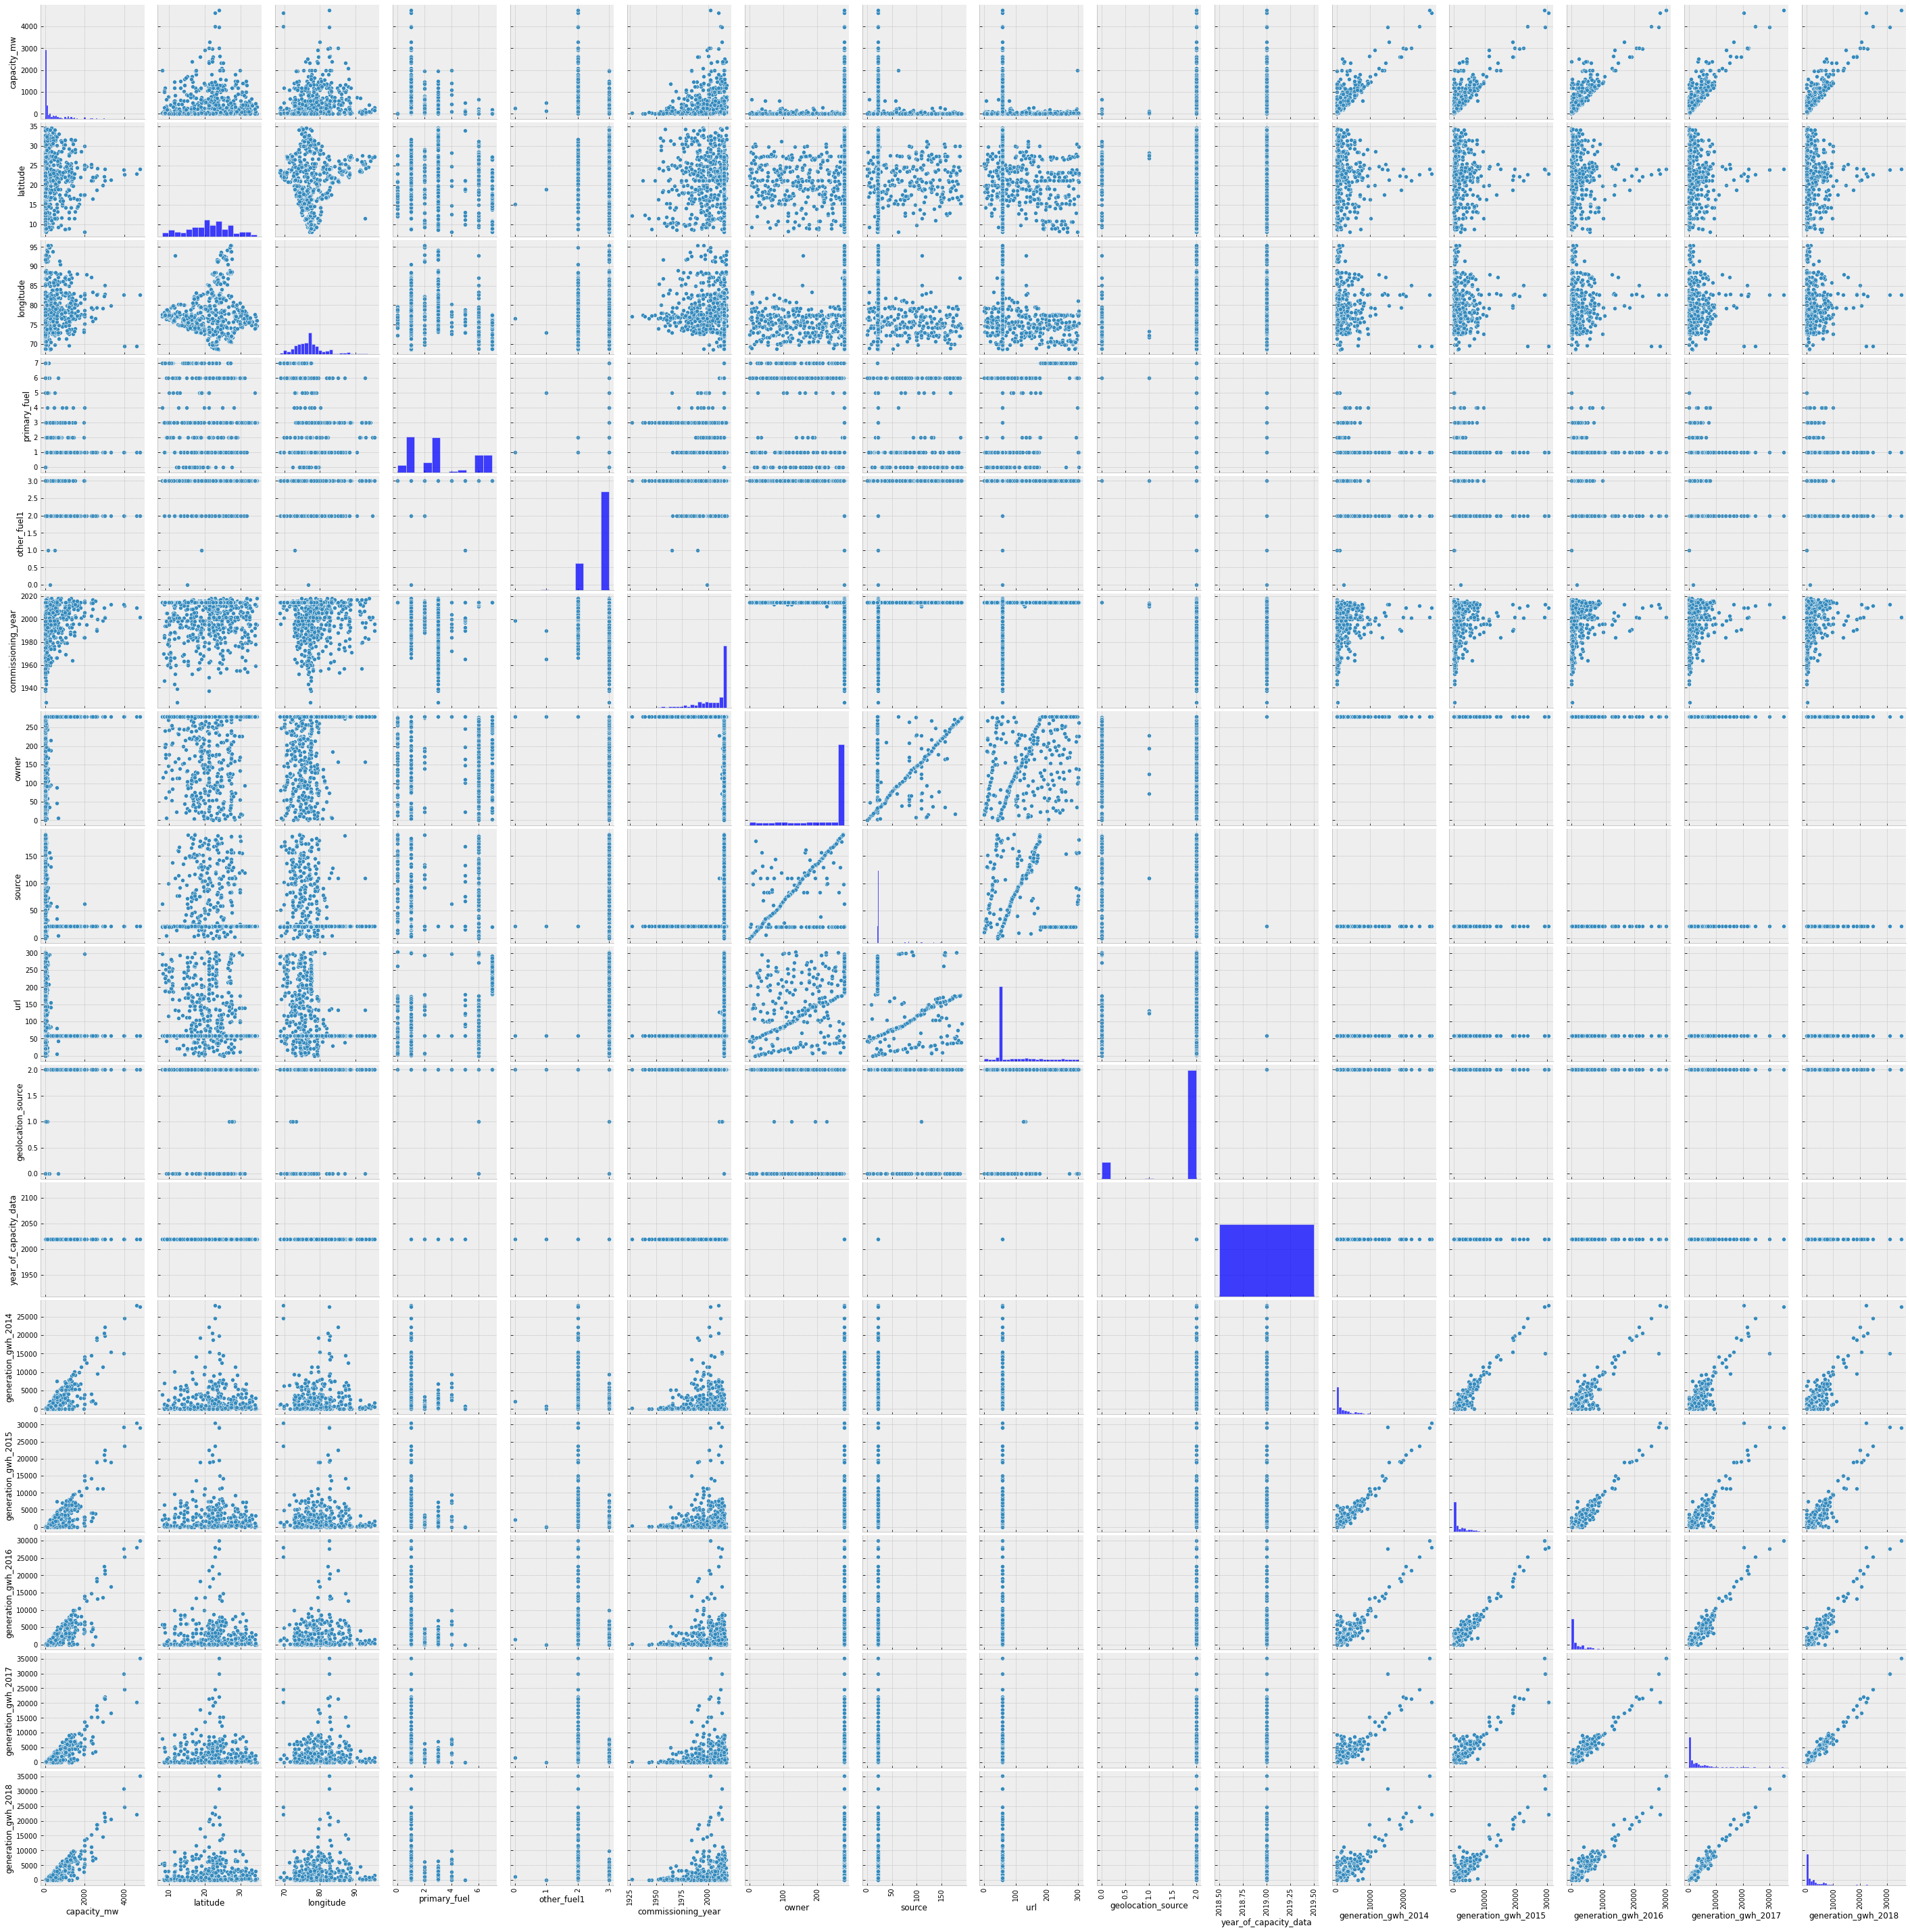

In [138]:
plt.style.use('bmh')
g = sns.pairplot(df)
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

- From the above pair plot we can see the data distribution amongst the numerical data type columns.



# Model with Target Variable: primary_fuel



In [139]:
# Splitting the data
y1 = df['primary_fuel']
x1 = df.drop(['primary_fuel'],axis = 1)

Dealing with the problem of class imbalance




In [142]:
# Dealing with the problem of class imbalance
le = LabelEncoder()
df["primary_fuel"] = le.fit_transform(df["primary_fuel"])
df.head()

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0          2.5   28.1839    73.2407             6            3   
1         98.0   24.7663    74.6090             1            3   
2         39.2   21.9038    69.3732             7            3   
3        135.0   23.8712    91.3602             2            3   
4       1800.0   21.9603    82.4091             1            2   

   commissioning_year  owner  source  url  geolocation_source  \
0              2011.0    229     109  128                   1   
1              2015.0    258     174  173                   2   
2              2015.0      2      21  205                   2   
3              2004.0    280      22   58                   2   
4              2015.0    280      22   58                   2   

   year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3                 2019.0           617.789264              843.747   
4                 2019.0          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0                  NaN                  NaN                  NaN  
1                  NaN                  NaN                  NaN  
2                  NaN                  NaN                  NaN  
3           886.004428           663.774500           626.239128  
4          6243.000000          5385.579736          7279.000000

- I am using Label Encoder on our target column "primary_fuel" since we want our labels to be converted from the object datatype to numerical datatype.



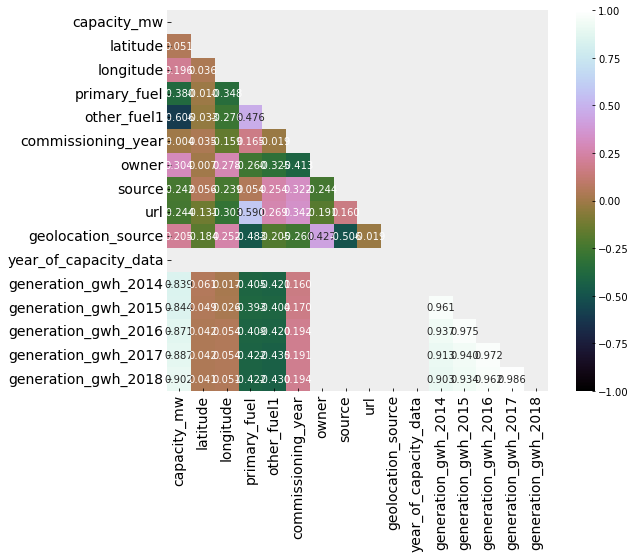

In [144]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- In the above heatmap we can see that our target labels "capacity_mw" and "primary_fuel" has both positive and negative correlations with the remaining feature columns. Also we see very less or negligible amount of multi colinearity so we will not have to worry about it. Since the one's which are reflecting the value are inter dependent on those feature columns and I intend to retain and keep them.

# Correlation Bar Plot comparing features with our labels


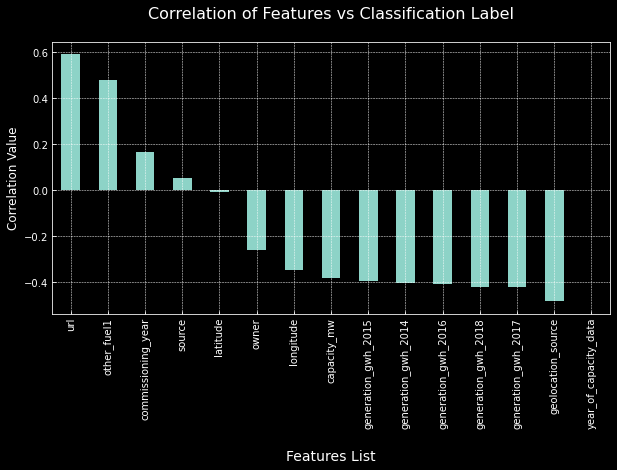

In [145]:
plt.style.use('dark_background')
data_corr = df.corr()
plt.figure(figsize=(10,5))
data_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Classification Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

- When we consider our classification label "primary_fuel" then we can see the remaining columns that are the features have 2 of them with positive correlation and 4 of them with neagtive correlation.

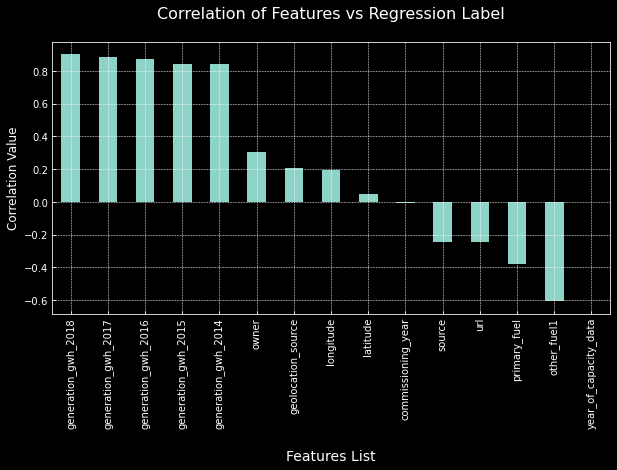

In [146]:
data_corr = df.corr()
plt.figure(figsize=(10,5))
data_corr['capacity_mw'].sort_values(ascending=False).drop('capacity_mw').plot.bar()
plt.title("Correlation of Features vs Regression Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

- When we consider our regression label "capacity_mw" then we can see the remaining columns that are the features have 4 of them with positive correlation and 2 of them with neagtive correlation.

# Using Log Transform to fix skewness


In [148]:
for col in float_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

- Converted the data in the series
- I have applied Log Transformation on our numerical float datatype columns to ensure that we do not have skewness in our dataset.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and classification label

In [149]:
X = df.drop('primary_fuel', axis=1)
Y = df['primary_fuel']

- I have bifurcated the dataset into features and classification label where X represents all the feature columns and Y represents the classification target label column.



# Resolving the class imbalance issue in our label column


In [150]:
Y.value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

- Listing the values of our classification label column to count the number of rows occupied by each category. This indicates class imbalance that we will need to fix by using the oversampling method.

# Feature Scaling


In [151]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

capacity_mw  latitude  longitude  other_fuel1  commissioning_year  \
0    -1.628938  1.149805  -0.899131     0.519008            0.407327   
1     0.158583  0.587311  -0.592393     0.519008            0.661679   
2    -0.323415  0.116179  -1.797707     0.519008            0.661679   
3     0.328403  0.439989   2.768797     0.519008           -0.037788   
4     1.710051  0.125479   1.056654    -1.811388            0.661679   

      owner    source       url  geolocation_source  year_of_capacity_data  \
0  0.018166  1.460215  0.476673           -1.083349                    NaN   
1  0.363907  2.917019  1.116401            0.394241                    NaN   
2 -2.688153 -0.512075  1.571318            0.394241                    NaN   
3  0.626193 -0.489662 -0.518459            0.394241                    0.0   
4  0.626193 -0.489662 -0.518459            0.394241                    0.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3             0.046691             0.205605             0.216924   
4             0.710879             1.013547             1.025762   

   generation_gwh_2017  generation_gwh_2018  
0                  NaN                  NaN  
1                  NaN                  NaN  
2                  NaN                  NaN  
3             0.086986             0.070416  
4             0.935281             1.040254

- I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

# Machine Learning Model for Classification with Evaluation Metrics


In [152]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=45)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

- I have defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [153]:
# Choosing Extra Trees Classifier

fmod_param = {'criterion' : ["gini", "entropy"],
              'n_jobs' : [2, 1, -1],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [20, 25, 30],
              'random_state' : [42, 45, 111]
             }

- After comparing all the classification models I have selected Extra Trees Classifier as my best model and have listed down it's parameters above referring the sklearn webpage. The reason behind selecting Extra Trees Classifier is because it got the highest accuracy score plus the cross validation score was even better for this model.

In [154]:
X = df.drop('capacity_mw', axis=1)
Y = df['capacity_mw']

In [155]:
# Displaying all the features after applying scaling technique to avoid bias output
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

latitude  longitude  primary_fuel  other_fuel1  commissioning_year  \
0  1.149805  -0.899131      1.225688     0.519008            0.407327   
1  0.587311  -0.592393     -0.967877     0.519008            0.661679   
2  0.116179  -1.797707      1.664401     0.519008            0.661679   
3  0.439989   2.768797     -0.529164     0.519008           -0.037788   
4  0.125479   1.056654     -0.967877    -1.811388            0.661679   

      owner    source       url  geolocation_source  year_of_capacity_data  \
0  0.018166  1.460215  0.476673           -1.083349                    NaN   
1  0.363907  2.917019  1.116401            0.394241                    NaN   
2 -2.688153 -0.512075  1.571318            0.394241                    NaN   
3  0.626193 -0.489662 -0.518459            0.394241                    0.0   
4  0.626193 -0.489662 -0.518459            0.394241                    0.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3             0.046691             0.205605             0.216924   
4             0.710879             1.013547             1.025762   

   generation_gwh_2017  generation_gwh_2018  
0                  NaN                  NaN  
1                  NaN                  NaN  
2                  NaN                  NaN  
3             0.086986             0.070416  
4             0.935281             1.040254

# Completed